#Task 1
Implement a basic CNN model from scratch using TensorFlow for image classification. In our dataset, we have 3 classes of digits which are 0, 1 and 2.

What you need to do is:

1. Split the dataset into training and validation set. 80% for training and the remaining 20% for validation. You should do this split in code. You are only provided with a single folder which is having all the 3 classes. Each sub-folder in the Hand_written_digits folder is considered a
separate class/category by the TensorFlow. TensorFlow allows you to do the split. Check TensorFlow official documentation to see how it is done. Images in the dataset are gray scale of size (100x100) pixel. The dataset provided to you is in the following format:

Hand_written_digits
<ol>
  <li>0_digits</li>
  <li>1_digits</li>
  <li>2_digits</li>
</ol>



In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Assignment_2/

/content/drive/MyDrive/Assignment_2


In [ ]:
!pwd

/content/drive/MyDrive/Assignment_2


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
class_names = ['0_digits', '1_digits', '2_digits']
class_labels = {}
for i, classes in enumerate(class_names, start=0):
  class_labels[classes] = i
print(class_labels)

{'0_digits': 0, '1_digits': 1, '2_digits': 2}


In [ ]:
image_size = (100, 100)
num_classes = 3
batch_size = 32
epochs = 10

In [ ]:
#directory
data_dir = "hand_written_digits"

In [ ]:
#Imagedatagen
datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
)

In [ ]:
# Split of dataset
train_datagen = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    color_mode='grayscale'
)

val_datagen = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale'
)


Found 3728 images belonging to 3 classes.
Found 930 images belonging to 3 classes.


In [ ]:
# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Add dropout to prevent overfitting
    Dense(3, activation='softmax')  # 3 classes (0, 1, 2)
])


In [ ]:
#Model complilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_datagen,
    steps_per_epoch=len(train_datagen),
    validation_data=val_datagen,
    validation_steps=len(val_datagen),
    epochs=epochs,
)

Epoch 1/10
117/117 [==============================] - 1279s 11s/step - loss: 0.1715 - accuracy: 0.9391 - val_loss: 0.0536 - val_accuracy: 0.9839
Epoch 2/10
117/117 [==============================] - 9s 76ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0439 - val_accuracy: 0.9871
Epoch 3/10
117/117 [==============================] - 7s 63ms/step - loss: 0.0258 - accuracy: 0.9925 - val_loss: 0.0459 - val_accuracy: 0.9882
Epoch 4/10
117/117 [==============================] - 8s 70ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0448 - val_accuracy: 0.9892
Epoch 5/10
117/117 [==============================] - 9s 76ms/step - loss: 0.0118 - accuracy: 0.9957 - val_loss: 0.0574 - val_accuracy: 0.9849
Epoch 6/10
117/117 [==============================] - 8s 65ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0405 - val_accuracy: 0.9925
Epoch 7/10
117/117 [==============================] - 8s 69ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0540 - val_accuracy: 0.99

In [ ]:
#Metrics check
accuracy = model.evaluate(val_datagen)
print(f"Validation Accuracy: {accuracy[1] * 100:.2f}%")

30/30 [==============================] - 1s 45ms/step - loss: 0.0341 - accuracy: 0.9882
Validation Accuracy: 98.82%


# Task 2

Now this time do Task 1 again by fine-tuning the pre-trained model of your choice. Observe the accuracy of the model and compare it  with the accuracy of the model in task 1.



In [ ]:
import os
from tqdm import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt

import random

from sklearn.utils import shuffle

from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, activations
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
#from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from sklearn.model_selection import train_test_split


%matplotlib inline

In [ ]:
class_names = ['0_digits', '1_digits', '2_digits']
class_labels = {}
for i, classes in enumerate(class_names, start=0):
  class_labels[classes] = i
print(class_labels)

{'0_digits': 0, '1_digits': 1, '2_digits': 2}


In [ ]:
image_size = (100, 100)

In [ ]:
num_classes = 3
batch_size = 30
epochs = 10

In [ ]:
data_dir = "hand_written_digits"

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
)

In [ ]:
#Importing model weights
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

In [ ]:
vgg16_model.input

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'input_7')>

In [ ]:
#Freezing the output layers
for layer in vgg16_model.layers:
    layer.trainable = False

In [ ]:
# Split the dataset
train_datagen = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    color_mode='rgb'
)

val_datagen = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb'
)


Found 3728 images belonging to 3 classes.
Found 930 images belonging to 3 classes.


In [ ]:
# adding top layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

In [ ]:
# Transfer learning
model_VGG16 = Model(inputs=vgg16_model.input, outputs=predictions)

In [ ]:
model_VGG16.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_VGG16.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [ ]:
trained_VGG16 = model_VGG16.fit(train_datagen, epochs=epochs, validation_data=val_datagen)

Epoch 1/10
117/117 [==============================] - 1301s 11s/step - loss: 0.0937 - accuracy: 0.9721 - val_loss: 0.0261 - val_accuracy: 0.9903
Epoch 2/10
117/117 [==============================] - 9s 74ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0259 - val_accuracy: 0.9914
Epoch 3/10
117/117 [==============================] - 8s 71ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0146 - val_accuracy: 0.9903
Epoch 4/10
117/117 [==============================] - 9s 73ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0192 - val_accuracy: 0.9946
Epoch 5/10
117/117 [==============================] - 9s 76ms/step - loss: 0.0077 - accuracy: 0.9965 - val_loss: 0.0114 - val_accuracy: 0.9935
Epoch 6/10
117/117 [==============================] - 8s 72ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0145 - val_accuracy: 0.9957
Epoch 7/10
117/117 [==============================] - 9s 73ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0191 - val_accuracy: 0.99

In [ ]:
#Metrics evaluation
accuracy = model_VGG16.evaluate(val_datagen)
print(f"Validation Accuracy: {accuracy[1] * 100:.2f}%")

30/30 [==============================] - 2s 56ms/step - loss: 0.0166 - accuracy: 0.9935
Validation Accuracy: 99.35%


# Task 3 (VGG16)

Now that you understand the importance of CNNs in image searching and retrieval, it's time to apply your knowledge and create your first image retrieval system. Follow the instructions below to complete  this assignment:
1. Write a Python program that allows users to select a query image from folder “query_images” and retrieve the top N similar images from a local folder named images_database”. Put N=4 for this task so the system must spit out 4 similar images from the given folder closely similar to your query image. Your program should use a pre-trained CNN model (e.g., VGG16 or ResNet) for feature extraction and a similarity metric (e.g., Euclidean distance) for retrieval.
2. Ensure that your program can handle images in various formats (e.g., JPG, PNG, JPEG).
3. Provide clear instructions on how to run your program and demonstrate its functionality using sample query images.
This coding task allows you to apply your understanding of CNN-based feature extraction to build a practical image retrieval system, like the technologies used by Google Lens.

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNetRS50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
database_folder = "images_retreival_local_database"
query_image_folder= "query_images"
N = 4

In [ ]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

In [ ]:
# storing query image features
query_features = []
query_image_files = []


for item in os.listdir(query_image_folder):
    query_image_path = os.path.join(query_image_folder, item)


    if os.path.isfile(query_image_path) and item.lower().endswith((".jpg", ".jpeg", ".png")):
        query_image = cv2.imread(query_image_path)
        query_image = cv2.resize(query_image, (200, 200))
        query_image = preprocess_input(query_image)
        query_features.append(vgg16_model.predict(np.expand_dims(query_image, axis=0)).flatten())
        query_image_files.append(item)

query_features = np.array(query_features)



1/1 [==============================] - 0s 40ms/step


In [ ]:
# storing database image features
database_features = []
database_image_files = []

for item in os.listdir(database_folder):
    database_image_path = os.path.join(database_folder, item)

    if os.path.isfile(database_image_path) and item.lower().endswith((".jpg", ".jpeg", ".png")):
        database_image = cv2.imread(database_image_path)
        database_image = cv2.resize(database_image, (200, 200))
        database_image = preprocess_input(database_image)
        database_features.append(vgg16_model.predict(np.expand_dims(query_image, axis=0)).flatten())
        database_image_files.append(item)

database_features = np.array(database_features)




1/1 [==============================] - 0s 19ms/step


In [ ]:
similar_images = []

for i, query_feature in enumerate(query_features):
    distances = euclidean_distances(query_feature.reshape(1, -1), database_features)

    for j, database_feature in enumerate(database_features):
        similar_images.append((query_image_files[i], database_image_files[j], distances[0][j]))

In [ ]:
# Sort similar images
similar_images.sort(key=lambda x: x[2])

In [ ]:
# Retrieve images
top_similar_images = similar_images[:N]

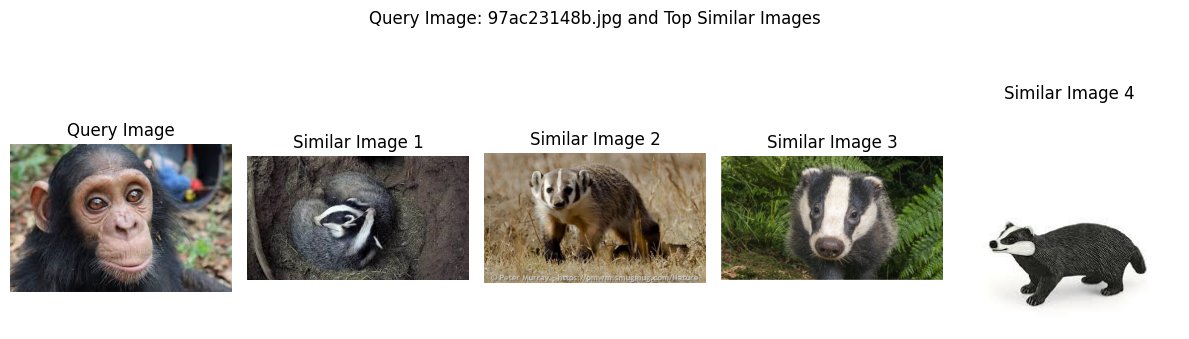

In [ ]:
plt.figure(figsize=(12, 4))
plt.suptitle(f"Query Image: {query_image_filename} and Top Similar Images")

plt.subplot(1, N+1, 1)
plt.title("Query Image")
plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

for i, (_, database_image_filename, _) in enumerate(top_similar_images):
  database_image_path = os.path.join(database_folder, database_image_filename)
  database_image = cv2.imread(database_image_path)

  plt.subplot(1, N+1, i+2)
  plt.title(f"Similar Image {i+1}")
  plt.imshow(cv2.cvtColor(database_image, cv2.COLOR_BGR2RGB))
  plt.axis('off')

plt.tight_layout()
plt.show()

#Task 3 (ResNetRS50)

In [ ]:
ResNetRS50_model = ResNetRS50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

135360144/135360144 [==============================] - 1s 0us/step


In [ ]:
query_features_1 = []
query_image_files_1 = []

for item in os.listdir(query_image_folder):
    query_image_path = os.path.join(query_image_folder, item)

    if os.path.isfile(query_image_path) and item.lower().endswith((".jpg", ".jpeg", ".png")):
        query_image = cv2.imread(query_image_path)
        query_image = cv2.resize(query_image, (200, 200))
        query_image = preprocess_input(query_image)
        query_features_1.append(ResNetRS50_model.predict(np.expand_dims(query_image, axis=0)).flatten())
        query_image_files_1.append(item)

1/1 [==============================] - 0s 29ms/step


In [ ]:
database_features_1 = []
database_image_files_1 = []

for item in os.listdir(database_folder):
    database_image_path = os.path.join(database_folder, item)

      if os.path.isfile(database_image_path) and item.lower().endswith((".jpg", ".jpeg", ".png")):
        database_image = cv2.imread(database_image_path)
        database_image = cv2.resize(database_image, (200, 200))
        database_image = preprocess_input(database_image)
        database_features_1.append(ResNetRS50_model.predict(np.expand_dims(query_image, axis=0)).flatten())
        database_image_files_1.append(item)

database_features_1 = np.array(database_features)


1/1 [==============================] - 0s 27ms/step


In [ ]:
similar_images_1 = []

for i, query_feature_1 in enumerate(query_features_1):
    distances = euclidean_distances(query_feature_1.reshape(1, -1), database_features_1)

    for j, database_feature_1 in enumerate(database_features_1):
        similar_images_1.append((query_image_files_1[i], database_image_files_1[j], distances[0][j]))

In [ ]:
similar_images_1.sort(key=lambda x: x[2])

In [ ]:
top_similar_images_1 = similar_images_1[:N]

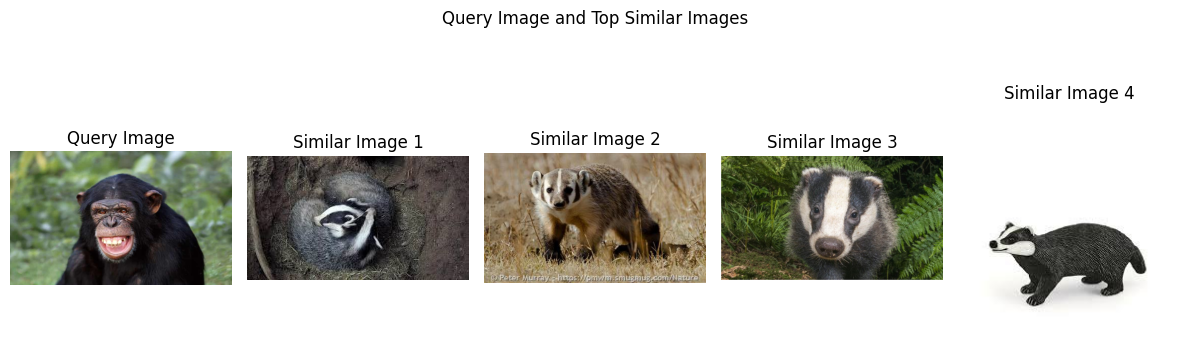

In [ ]:
for query_image_filename, database_image_filename, _ in top_similar_images_1:
    query_image_path = os.path.join(query_image_folder, query_image_filename)
    database_image_path = os.path.join(database_folder, database_image_filename)

    query_image = cv2.imread(query_image_path)
    database_image = cv2.imread(database_image_path)

plt.figure(figsize=(12, 4))
plt.suptitle("Query Image and Top Similar Images")

plt.subplot(1, N+1, 1)
plt.title("Query Image")
plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

for i, (_, database_image_filename, _) in enumerate(top_similar_images):
    database_image_path = os.path.join(database_folder, database_image_filename)
    database_image = cv2.imread(database_image_path)

    plt.subplot(1, N+1, i+2)
    plt.title(f"Similar Image {i+1}")
    plt.imshow(cv2.cvtColor(database_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()